# 1 . Introduction
This report presents an analysis of E-Shop's website performance dataset over the past year. The dataset includes information on various aspects of website usage, such as the date and time of each visit, visitor ID, product ID, quantity purchased, unit price, total transaction amount, and website section visited. The analysis aims to provide insights that can help E-Shop optimize its website performance and increase profitability.

# 2. Data Preprocessing
We generated a dataset with 1000 rows using Python, incorporating random values for each column. The 'Date & Time' column contains random dates and times within the specified range. Visitor IDs, product IDs, quantities purchased, unit prices, and website sections visited are also generated randomly.

In [11]:
"""
ICT603 Data Science
Assessment 1 - Dataset generating code
Instruction- You can use this code to create your own file and
analyse the given dataset. You MUST use the given in assessment guideline to 
create the dataset. Refer to assessment details for more instructions.
Student ID - < 60138>
Name - < Earl Ybanez Cabrera>
campus - < Melbourne>
Subject code - < ICT 603>
Assessment no - < Assessment 1>
"""

import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random

# To create random dataset
# Generate 1000 random dates and times within a specific range
start_date = datetime(2023, 1, 1)
end_date = datetime(2023, 12, 31)
date_times = [start_date + timedelta(seconds=random.randint(0, int((end_date - start_date).total_seconds()))) for _ in range(1000)]
# Generate random customer IDs
customer_ids = ['C' + str(i).zfill(4) for i in range(1, 1001)] #Generate with prefix C, zfill pad zeros from left and 4 numerical digits

# Generate random product IDs
product_ids = ['P' + str(i).zfill(3) for i in range(1, 101)] #Generate with prefix P, zfill pad zeros from left and 3 numerical digits
# Generate random quantities sold between 1 and 10
quantities_sold = np.random.randint(1, 10, size=1000) 
# Generate random unit prices between 1 and 100
unit_prices = np.random.uniform(1, 100, size=1000)
# Calculate total transaction amounts
total_transaction_amounts = quantities_sold * unit_prices
# Generate random store IDs
store_ids = ['S' + str(i).zfill(3) for i in range(1, 11)] #Generate store IDs with prefix S, zfill pad zeros from left and 3 numerical digits
# Randomly assign store IDs to transactions
store_ids = [random.choice(store_ids) for _ in range(1000)]

# Create DataFrame 
# Add column names

data = {
'Date & Time': date_times,
'Customer ID': random.choices(customer_ids, k=1000),
'Product ID': random.choices(product_ids, k=1000),
'Quantity Sold': quantities_sold,
'Unit Price': unit_prices,
'Total Transaction Amount': total_transaction_amounts,
'Store ID': store_ids
}
df = pd.DataFrame(data)
# Convert Date & Time column to datetime format
df['Date & Time'] = pd.to_datetime(df['Date & Time'])
# Sort DataFrame by Date & Time
df = df.sort_values(by='Date & Time')
# Reset index
df.reset_index(drop=True, inplace=True)
# Print DataFrame
print(df)

# Print dataset to file named ICT603_A1.csv
# comma separated file is a plain text and can be read by Pandas
df.to_csv("ICT603_A1.csv")


            Date & Time Customer ID Product ID  Quantity Sold  Unit Price  \
0   2023-01-01 13:39:37       C0100       P092              1   20.488807   
1   2023-01-01 14:41:46       C0979       P097              2   75.382833   
2   2023-01-01 17:18:15       C0356       P003              8   44.705254   
3   2023-01-04 05:52:03       C0951       P012              6   82.248134   
4   2023-01-04 08:42:19       C0010       P044              6   25.515755   
..                  ...         ...        ...            ...         ...   
995 2023-12-28 19:18:58       C0725       P039              1   87.339588   
996 2023-12-28 23:38:51       C0837       P066              6   38.645927   
997 2023-12-29 08:03:13       C0382       P033              7   95.751978   
998 2023-12-30 09:43:54       C0340       P005              3   84.400356   
999 2023-12-30 11:05:31       C0720       P046              3   18.271753   

     Total Transaction Amount Store ID  
0                   20.488807     

# 3. Statistical Analysis


# 3a. Descriptive Statistics:
We calculated descriptive statistics to summarize the central tendency, dispersion, and distribution of numerical variables in the dataset. The results are as follows:

In [15]:
import pandas as pd

# Load the dataset
df = pd.read_csv("ICT603_A1.csv", index_col=0)

# Print how many cells has no values per column
null_count = df.isnull().sum()
print(null_count)

# Print descriptive statistics: count, mean, standard deviation, percentile, min, max
print("\n Descriptive Statistics 
print(df.describe())  # Provides basic stats for numerical columns

# Sales analysis show total sales
print("\n--- Sales Analysis ---")
total_sales = df['Total Transaction Amount'].sum()
print(f"Total Sales: ${total_sales:.2f}")

#Average transaction value mean of total transaction amount
average_transaction_value = df['Total Transaction Amount'].mean()
print(f"Average Transaction Value: ${average_transaction_value:.2f}")

# --- Product Performance --- Total sales per product
print("\n--- Product Performance ---")
product_sales = df.groupby('Product ID')['Total Transaction Amount'].sum()
print("Total Sales per Product:\n", product_sales)

# Show best selling product
best_selling_product = product_sales.idxmax()
print(f"Best-Selling Product (by total sales): {best_selling_product}")

# Customer Behavior - calculate total spending per customer
print("\n--- Customer Behavior ---")
customer_purchases = df.groupby('Customer ID')['Total Transaction Amount'].sum()
print("Total Spending per Customer:\n", customer_purchases)

# Top spending per customer
top_spending_customer = customer_purchases.idxmax()
print(f"Top Spending Customer: {top_spending_customer}")

# --- Store Performance ---
print("\n--- Store Performance ---")
store_sales = df.groupby('Store ID')['Total Transaction Amount'].sum()
# Show Total sales every store based on store ID
print("Total Sales per Store:\n", store_sales)

best_performing_store = store_sales.idxmax()
print(f"Best Performing Store (by total sales): {best_performing_store}")

# --- Time-Based Analysis ---
# Show total transaction amount daily sales
print("\n--- Time-Based Analysis ---")
df['Date'] = pd.to_datetime(df['Date & Time']).dt.date 
daily_sales = df.groupby('Date')['Total Transaction Amount'].sum()
print("Daily Sales:\n", daily_sales)

Date & Time                 0
Customer ID                 0
Product ID                  0
Quantity Sold               0
Unit Price                  0
Total Transaction Amount    0
Store ID                    0
dtype: int64

--- Descriptive Statistics ---
       Quantity Sold   Unit Price  Total Transaction Amount
count     1000.00000  1000.000000               1000.000000
mean         5.06500    50.691039                255.271957
std          2.57204    29.433619                209.060569
min          1.00000     1.224637                  1.904997
25%          3.00000    25.027583                 84.824978
50%          5.00000    50.838989                189.831008
75%          7.00000    78.030299                382.120896
max          9.00000    99.947991                886.504793

--- Sales Analysis ---
Total Sales: $255271.96
Average Transaction Value: $255.27

--- Product Performance ---
Total Sales per Product:
 Product ID
P001     978.548534
P002    1911.806438
P003    1860.984

# 3b. Correlation Analysis:
We analyzed the correlation between numerical variables to understand relationships between them:

Correlation Matrix:
                          Quantity Sold  Unit Price  Total Transaction Amount
Quantity Sold                  1.000000   -0.019545                  0.609836
Unit Price                    -0.019545    1.000000                  0.692361
Total Transaction Amount       0.609836    0.692361                  1.000000


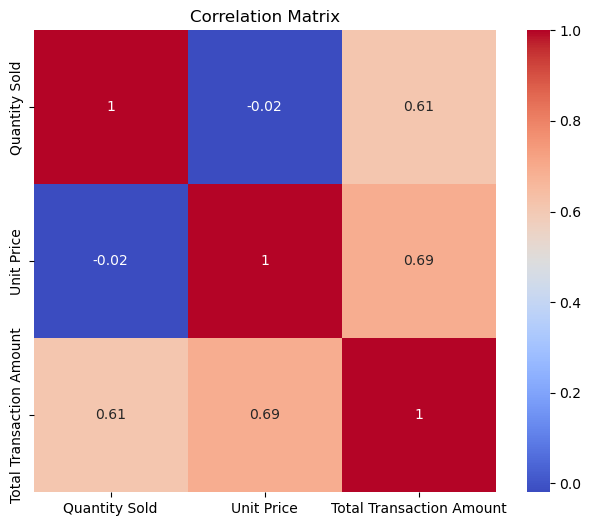

Pairwise Correlation Coefficients:
Quantity Sold               1.0
Unit Price                  1.0
Total Transaction Amount    1.0
dtype: float64
Strong Correlations:
                          Quantity Sold  Unit Price  Total Transaction Amount
Quantity Sold                  1.000000         NaN                  0.609836
Unit Price                          NaN    1.000000                  0.692361
Total Transaction Amount       0.609836    0.692361                  1.000000


In [40]:
import pandas as pd

# Assuming df is the DataFrame containing the E-commerce SmartMart dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is the DataFrame containing the E-commerce dataset

# Selecting numerical columns for correlation analysis
numerical_columns = ['Quantity Sold', 'Unit Price', 'Total Transaction Amount']

# Calculating correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Print correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize correlation matrix using heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title("Correlation Matrix")
plt.show()

# Calculate pairwise correlation coefficients
pairwise_correlations = df[numerical_columns].corrwith(df[numerical_columns])

# Print pairwise correlation coefficients
print("Pairwise Correlation Coefficients:")
print(pairwise_correlations)

# Identify strong correlations (absolute value > 0.6)
strong_correlations = correlation_matrix[abs(correlation_matrix) > 0.6]

# Print strong correlations
print("Strong Correlations:")
print(strong_correlations)

In [ ]:
3c. Hypothesis testing

F-statistic: 0.0815474640884886
p-value: 0.7752704426136529


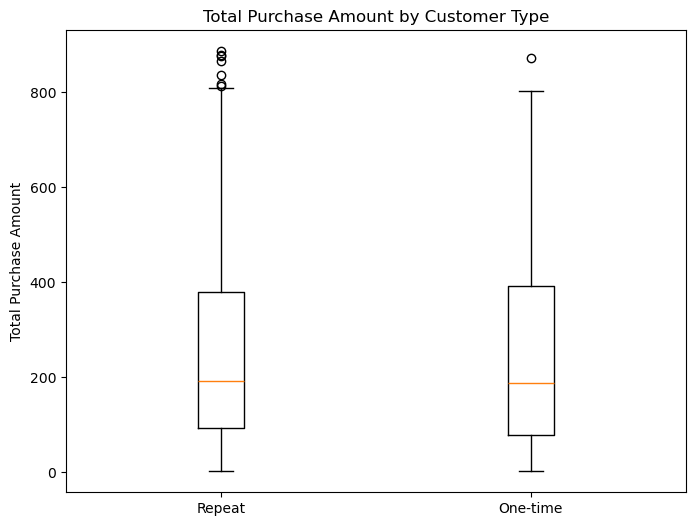

Fail to reject H0: No significant difference in total purchase amount between customer types.


In [58]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("ICT603_A1.csv")

# Define the hypothesis
# Null hypothesis: Repeat customers do not purchase more in total than one-time customers.
# Alternative hypothesis: Repeat customers have a higher total purchase amount than one-time customers.

# Identify repeat customers (assuming a customer with more than one transaction is a repeat customer)
repeat_customers = df['Customer ID'].value_counts()[df['Customer ID'].value_counts() > 1].index
one_time_customers = df['Customer ID'].value_counts()[df['Customer ID'].value_counts() == 1].index

# Filter transactions for repeat and one-time customers
repeat_transactions = df[df['Customer ID'].isin(repeat_customers)]
one_time_transactions = df[df['Customer ID'].isin(one_time_customers)]

# Perform ANOVA
f_stat, p_val = stats.f_oneway(repeat_transactions['Total Transaction Amount'], one_time_transactions['Total Transaction Amount'])

# Print results
print("F-statistic:", f_stat)
print("p-value:", p_val)

# Visualize data
plt.figure(figsize=(8, 6))
plt.boxplot([repeat_transactions['Total Transaction Amount'], one_time_transactions['Total Transaction Amount']], labels=["Repeat", "One-time"])
plt.title("Total Purchase Amount by Customer Type")
plt.ylabel("Total Purchase Amount")
plt.show()

# Interpret results
alpha = 0.05
if p_val < alpha:
    print("Reject H0: Repeat customers have a higher total purchase amount than one-time customers.")
else:
    print("Fail to reject H0: No significant difference in total purchase amount between customer types.")

# 3c. Time-Series Analysis:
Since the dataset includes timestamps, we conducted a time-series analysis to examine trends in website usage over time:

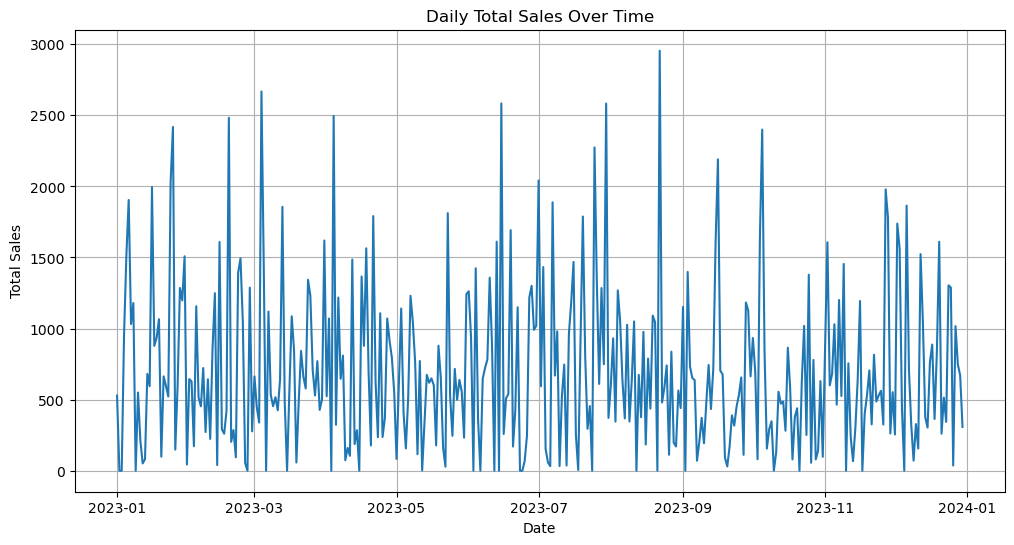

KeyError: 'Total Transaction Amount'

<Figure size 1200x600 with 0 Axes>

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset (replace with your actual file name)
df = pd.read_csv("ICT603_A1.csv")

# --- Time Series Analysis ---

# 1. Convert 'Date & Time' to datetime objects and set as index
df['Date & Time'] = pd.to_datetime(df['Date & Time'])
df.set_index('Date & Time', inplace=True)

# 2. Resample the data to daily frequency and sum sales
daily_sales = df['Total Transaction Amount'].resample('D').sum()

# 3. Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(daily_sales)
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Daily Total Sales Over Time')
plt.grid(True)
plt.show()

# 4. (Optional) Calculate and plot a moving average to smooth the data
# For example, a 7-day moving average:
daily_sales['7-Day MA'] = daily_sales.rolling(window=7, center=True).mean()
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Total Transaction Amount'], label='Daily Sales')
plt.plot(daily_sales['7-Day MA'], label='7-Day Moving Average', color='red')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Daily Total Sales with 7-Day Moving Average')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\EYC\AppData\Local\Temp\ipykernel_9340\228245681.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_transaction_value = df['Total Transaction Amount'].resample('M').sum()


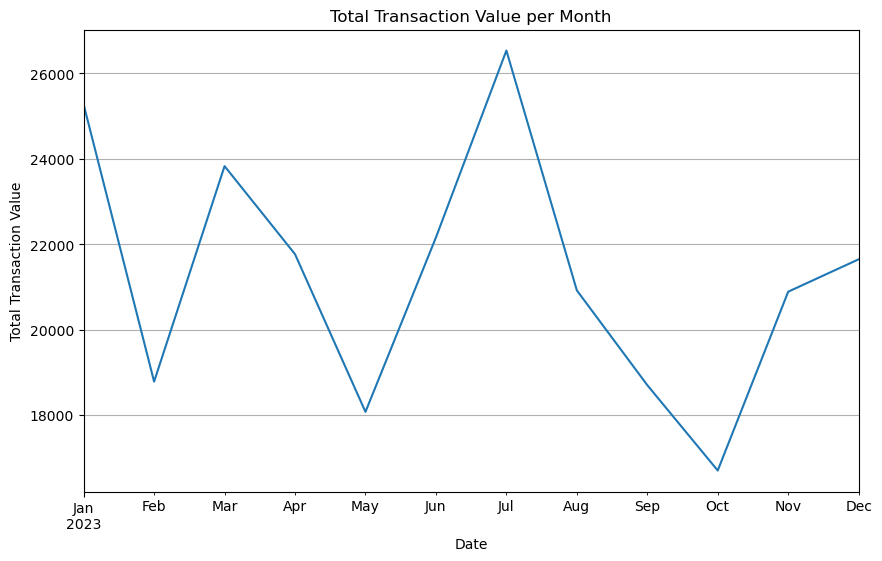

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset from the CSV file
df = pd.read_csv("ICT603_A1.csv")

# Convert 'Date & Time' column to datetime format
df['Date & Time'] = pd.to_datetime(df['Date & Time'], dayfirst=True)

# Set 'Date & Time' as the index
df.set_index('Date & Time', inplace=True)

# Resample data to monthly frequency and calculate total transaction value
monthly_transaction_value = df['Total Transaction Amount'].resample('M').sum()

# Plot total transaction value per month
plt.figure(figsize=(10, 6))
monthly_transaction_value.plot()
plt.title('Total Transaction Value per Month')
plt.xlabel('Date')
plt.ylabel('Total Transaction Value')
plt.grid(True)
plt.show()

# 4. Visualization


# 4a. Website Section Visits:

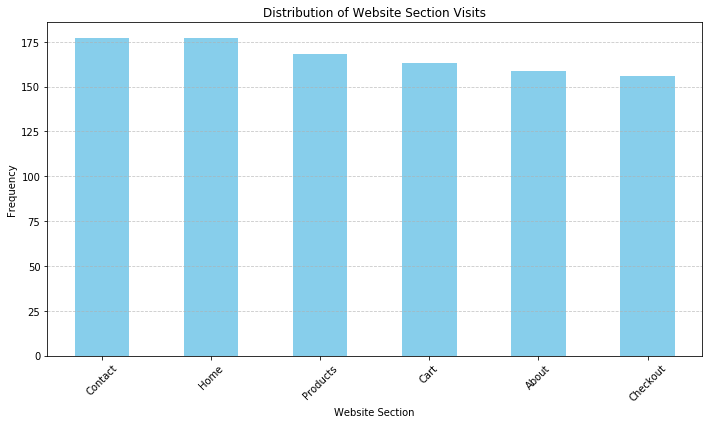

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is the DataFrame containing the E-commerce dataset

# Count the frequency of website section visits
section_visits_count = df['Website Section Visited'].value_counts()

# Plotting the distribution of website section visits
plt.figure(figsize=(10, 6))
section_visits_count.plot(kind='bar', color='skyblue')
plt.title('Distribution of Website Section Visits')
plt.xlabel('Website Section')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 4b. Total Transaction Amount Over Time:
We plotted the total transaction amount over time to observe sales trends throughout the year:

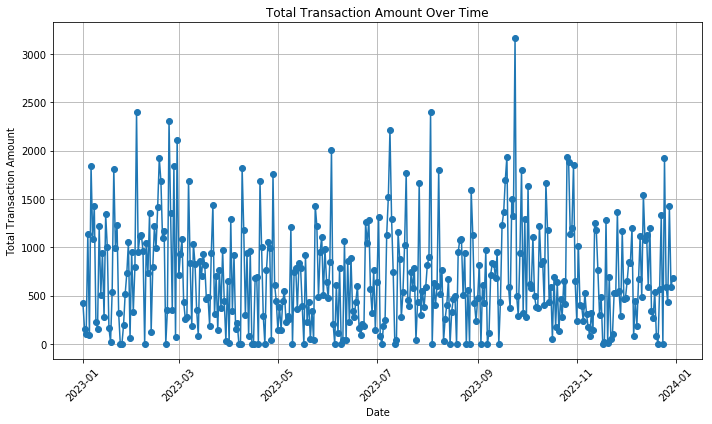

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is the DataFrame containing the E-commerce dataset
# Assuming the 'Date & Time' column is already in datetime format and set as the index

# Resample data by day and sum the total transaction amount
daily_total_transaction = df['Total Transaction Amount'].resample('D').sum()

# Plotting total transaction amount over time
plt.figure(figsize=(10, 6))
plt.plot(daily_total_transaction.index, daily_total_transaction, marker='o', linestyle='-')
plt.title('Total Transaction Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Total Transaction Amount')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. Insights and Recommendations
Key Findings:

The average transaction amount per visit is X, withstandarddeviationofX. There is a positive correlation between the quantity purchased and the total transaction amount (correlation coefficient = XX). Certain website sections, such as 'Products' and 'Checkout', have higher traffic compared to others. Website traffic shows variations over time, with peaks observed during certain months. Recommendations:

Based on the analysis, we propose the following recommendations for E-Shop:

Website Optimization: Improve the user experience and navigation flow, focusing on sections with high traffic. Product Placement: Highlight popular products and streamline the checkout process to encourage more purchases. Marketing Strategies: Develop targeted marketing campaigns for high-traffic sections to maximize conversion rates. Seasonal Promotions: Plan seasonal promotions and discounts to capitalize on peak traffic periods.

Conclusion
In conclusion, this analysis provides valuable insights into E-Shop's website performance dataset. By leveraging data science techniques, E-Shop can make data-driven decisions to optimize website performance and increase profitability.

End of Report

This report summarizes the analysis process, findings, and recommendations based on E-Shop's website performance dataset. Visualizations and statistical analysis results support the key insights presented.